Este colab fue desarrollado por Arnold Charry Armero

# Oil Blending

Sunco Oil fabrica tres tipos de gasolina (gas 1, gas 2 y gas 3). Cada tipo es
Se produce mezclando tres tipos de petróleo crudo (crudo 1, crudo 2 y crudo 3). Las ventas
El precio por barril de gasolina y el precio de compra por barril de petróleo crudo se dan en
Cuadro 12. Sunco puede comprar hasta 5.000 barriles diarios de cada tipo de petróleo crudo.
Los tres tipos de gasolina se diferencian por su octanaje y contenido de azufre. El petróleo crudo
mezclado para formar el gas 1 debe tener un octanaje promedio de al menos 10 y contener como máximo
1% de azufre. El petróleo crudo mezclado para formar el gas 2 debe tener un octanaje promedio de al menos
8 y contienen como máximo un 2% de azufre. El petróleo crudo mezclado para formar el gas 3 debe tener un octanaje de al menos 6 y contener como máximo un 1% de azufre. El octanaje y el contenido de azufre del
En la tabla 13 se dan tres tipos de petróleo. Transformar un barril de petróleo en un barril de gasolina cuesta $\$ 4$, y la refinería de Sunco puede producir hasta 14 000 barriles de gasolina por día.
Los clientes de Sunco necesitan las siguientes cantidades de cada gasolina: gas de 1 a 3.000 barrilels por día; gas 2—2.000 barriles por día; gas 3—1.000 barriles por día. La empresa
considera una obligación cumplir con estas exigencias. Sunco también tiene la opción de hacer publicidad para estimular la demanda de sus productos. Cada dólar gastado diariamente en publicidad de un tipo particular de gas aumenta la demanda diaria de ese tipo de gas en 10 barriles. Por ejemplo, si Sunco decide gastar $20 diarios en publicidad del gas 2, entonces la demanda diaria de
El gas 2 aumentará en 20(10) 200 barriles. Formule un LP que le permita a Sunco
maximizar las ganancias diarias (beneficios = ingresos - costos).

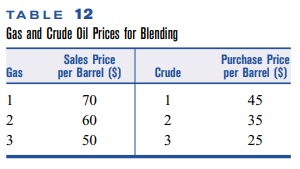

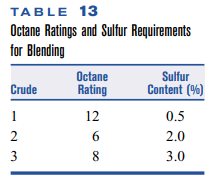

Teniendo presente,

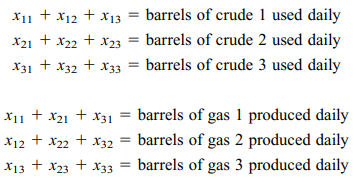

#Conjuntos

$ i = \text{Barril de crudo indexado por } i$

$ j = \text{Barril de gas indexado por } j$

# Parámetros

$ I_{j} = \textrm{Ingreso del barril de gas } j $

$ CB_{i} = \textrm{Costo de compra del barril de crudo } i $

$ CP_{ij} = \textrm{Costo de producir el gas } j \textrm{ por la mezcla del barril de crudo } i$

$ D_{j} = \textrm{Demanda de gas }j $

$ O_{i} = \textrm{Octano brindado por los barriles de crudo  }i $

$ S_{i} = \textrm{Porcentaje de sulfuro brindado por los barriles de crudo  }i$

$ OM_{j} = \textrm{Octano máximo brindado para el barril de gas  }j $

$ OS_{j} = \textrm{Sulfuro máximo brindado para el barril de gas  }j $

$ CA_{j} = \textrm{Cantidad de aumento en la demanda para estimular el gas } j $


## Variables de decisión

$ x_{ij} = \textrm{Cantidad producida de barriles de gas }j \textrm{ por los barriles de crudo }i$

$ a_{j} = \textrm{Publicidad invertida para estimular el gas } j $


## Función objetivo

$$ \textrm{Max } z = \sum_{j = 1}^{n} I_{j}\: x_{ij} - \sum_{i = 1}^{n} CB_{i}\: x_{ij} - \sum_{j = 1}^{n}\sum_{i = 1}^{n} CP_{ij}\: x_{ij} - \sum_{i = 1}^{n}CA_{j} a_{j}$$

Simplificando la función objetivo para poder manejarla quedando,

$$ \textrm{Max } z = \sum_{j = 1}^{n}\sum_{i = 1}^{n} U_{ij}\: x_{ij}  - \sum_{j = 1}^{n} a_{j}$$

donde $U_{ij}$ son las utilidades que genera cada barril de gas

## Restricciones

Se debe satisfacer la demanda,

$$ \sum_{i = 1}^{n} x_{ij} - CA_{j} a_{j} = D_{j}, \forall j$$

Sunco puede comprar hasta 5000 barriles de crudo $i$,

$$ \sum_{j = 1}^{n} x_{ij} \leq 5000, \forall i$$

Sunco tiene una capacidad de producción de hasta 14000 barriles de gas

$$ \sum_{j = 1}^{n} \sum_{i = 1}^{n} x_{ij} \leq 14000 $$

Cada barril de gas $i$ debe tener una cantidad de octano,

$$ \sum_{i = 1}^{n} O_{i} x_{ij} \geq OM_{j} \sum_{i = 1}^{n} x_{ij}, \forall j $$

Cada barril de gas $i$ debe tener un porcentaje de sulfuro,

$$ \sum_{i = 1}^{n} S_{i} x_{ij} \leq OS_{j} \sum_{i = 1}^{n} x_{ij}, \forall j $$


In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 19.1 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
crudo = range(3)
gas = range(3)

In [4]:
#Parámetros
U = [[21, 11, 1], [31, 21, 11], [41, 31, 21]]

D = [3000, 2000, 1000]

O = [12, 6, 8]

S = [0.5/100, 0.02, 0.03]

OM = [10, 8, 6]

OS = [0.01, 0.02, 0.01]

CA = [10, 10, 10]

In [5]:
# Crear la instancia del modelo
model = LpProblem(name="Oil_Blending", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (crudo, gas), 0, None, LpContinuous)
A = LpVariable.dicts("A", (gas), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([[U[i][j] * X[i][j] for i in crudo] for j in gas]) - lpSum([A[j] for j in gas])

# Agregar las restricciones

#Se debe satisfacer la demanda
for j in gas:
  model += lpSum([X[i][j] for i in crudo]) - CA[j] * A[j] == D[j]

#Sunco puede comprar hasta 5000 barriles de crudo i
for i in crudo:
  model += lpSum([X[i][j] for j in gas]) <= 5000

#La producción es como máximo de 14000
model += lpSum([([X[i][j] for i in crudo]) for j in gas]) <= 14000

for j in gas:
  model += lpSum([O[i] * X[i][j] for i in crudo]) >= OM[j] * lpSum([X[i][j] for i in crudo])

for j in gas:
  model += lpSum([S[i] * X[i][j] for i in crudo]) <= OS[j] * lpSum([X[i][j] for i in crudo])

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
A_0 = 0.0
A_1 = 750.0
A_2 = 0.0
X_0_0 = 2222.2222
X_0_1 = 2111.1111
X_0_2 = 666.66667
X_1_0 = 444.44444
X_1_1 = 4222.2222
X_1_2 = 333.33333
X_2_0 = 333.33333
X_2_1 = 3166.6667
X_2_2 = 0.0
Utilidades totales = $ 287749.99967
